# Random graph experiments I: Color

## Graph and data generation module ##

In [22]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=4 
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=4

In [23]:
import sys, time, random
import numpy as np
from model.MNLogit_bfgs_torch import MNLogit

In [24]:
filenames = sorted([name for name in os.listdir('features') if len(name.split('&')) > 3])

In [25]:
filenames

['nodes=1.0e+05&er_edges=5.0e+05&choice_edges=2.0e+04&color_ratio=1.0e-02&checkpoint=1.00&time=2019-08-03T01:03:05&seed=FGTTY4.npz&extract_time=2019-08-03T03:32:39.npz',
 'nodes=1.0e+05&er_edges=5.0e+05&choice_edges=2.0e+04&color_ratio=1.0e-02&checkpoint=1.00&time=2019-08-03T01:03:05&seed=TVD18I.npz&extract_time=2019-08-03T03:32:03.npz',
 'nodes=1.0e+05&er_edges=5.0e+05&choice_edges=2.0e+04&color_ratio=1.0e-02&checkpoint=1.00&time=2019-08-03T01:03:06&seed=16X0AB5.npz&extract_time=2019-08-03T03:32:33.npz',
 'nodes=1.0e+05&er_edges=5.0e+05&choice_edges=2.0e+04&color_ratio=1.0e-02&checkpoint=1.00&time=2019-08-03T01:03:06&seed=7DY7Z7.npz&extract_time=2019-08-03T03:32:41.npz',
 'nodes=1.0e+05&er_edges=5.0e+05&choice_edges=2.0e+04&color_ratio=1.0e-02&checkpoint=1.00&time=2019-08-03T01:03:16&seed=1L9GFM8.npz&extract_time=2019-08-03T03:32:37.npz',
 'nodes=1.0e+05&er_edges=5.0e+05&choice_edges=2.0e+04&color_ratio=1.0e-02&checkpoint=1.00&time=2019-08-03T01:03:19&seed=DH59GB.npz&extract_time=2019

In [26]:
def fit(kwargs, num_threads=1):
  dataset_id = kwargs['id']
  sampling = kwargs['sampling']
  c = sampling[0]
  dat = np.load('features/' + filenames[dataset_id])
  results = {'results':[]}
  results['dataset'] = {s.split('=')[0]:s.split('=')[1] for s in filenames[dataset_id].replace('.npz','').split('&')}
  results['dataset']['sampling'] = sampling
  
  for i in range(20):
    m = MNLogit(num_threads)
    m.data(dat['Xs_'+c][i], dat['ys_'+c][i], sws=dat['sws_'+c][i])
    m.fit(max_num_iter=500, clip=1.0, clip_norm_ord=2)
    info = m.get_model_info()
    info['se'] = list(info['se'])
    info['weights'] = list(info['weights'])
    results['results'].append(info)
    
  print("Dataset {},{} done".format(dataset_id,sampling))
  return results

In [27]:
from multiprocessing import Pool
from itertools import product
args = [{'id':i, 'sampling':s} for i,s in product(range(49), ['stratified','importance'])]
with Pool(49) as p:
  x = p.map(fit, args)

Dataset 4,importance done
Dataset 5,stratified done
Dataset 1,stratified done
Dataset 3,stratified done
Dataset 6,importance done
Dataset 6,stratified done
Dataset 3,importance done
Dataset 1,importance done
Dataset 2,importance done
Dataset 8,stratified done
Dataset 5,importance done
Dataset 0,stratified done
Dataset 4,stratified done
Dataset 22,stratified done
Dataset 23,importance done
Dataset 2,stratified done
Dataset 8,importance done
Dataset 20,importance done
Dataset 7,stratified done
Dataset 10,importance done
Dataset 13,stratified done
Dataset 10,stratified done
Dataset 0,importance done
Dataset 13,importance done
Dataset 16,importance done
Dataset 17,importance done
Dataset 22,importance done
Dataset 9,importance done
Dataset 21,stratified done
Dataset 11,importance done
Dataset 11,stratified done
Dataset 12,importance done
Dataset 12,stratified done
Dataset 21,importance done
Dataset 7,importance done
Dataset 24,stratified done
Dataset 23,stratified done
Dataset 15,importanc

In [ ]:
# import json
# with open('fitted-synthetic-color-degree.json','w') as f:
#   json.dump(x, f)

In [ ]:
# fit({'id':66, 'sampling':'stratified'}, num_threads=64)

In [ ]:
# import json
# with open('fitted-synthetic-color-degree.json','r') as f:
#   x = json.load(f)

In [39]:
from collections import Counter
xs = []
ys_s = []
ys_u = []
# np.random.shuffle(x)
for d in x:
  for i in range(20):
    if d['dataset']['sampling'] == 'importance':
      xs.append(float(d['dataset']['color_ratio']))
      ys_s.append(d['results'][i]['weights'][0])

Text(0.5,1,'weight of color, 23pos:1neg, color+fitness, log(N+1/s+1)')

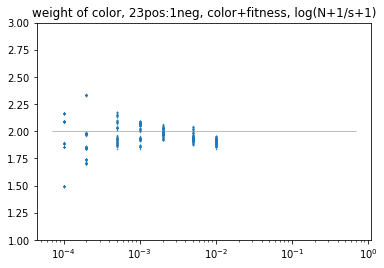

In [40]:
import matplotlib.pyplot as plt
plt.plot(xs, ys_s, '.', markersize=1)
plt.plot([7e-5 ,0.7], [2,2], color='grey', linewidth=0.5)
plt.xscale('log')
plt.ylim(1,3)
plt.title('weight of color, 23pos:1neg, color+fitness, log(N+1/s+1)')

In [ ]:
filename = 'nodes=1.0e+05&er_edges=5.0e+05&choice_edges=2.0e+04&color_ratio=1.0e-02&checkpoint=1.00&time=2019-08-02T14:58:30&seed=NGMCEM.npz&extract_time=2019-08-02T23:28:35'
dat = np.load("features/{}.npz".format(filename))

In [ ]:
new_sws = dat['sws_s']

In [ ]:
sampling = 'stratified'
c = sampling[0]
for i in range(15):
  m = MNLogit(num_threads=64)
  m.data(dat['Xs_'+c][i], dat['ys_'+c][i], sws=new_sws[i])
  m.fit(max_num_iter=500, clip=1.0, clip_norm_ord=2)
  print(m.get_model_info())